# Preguntas

- Cual es el numero de tarea? The doc says proyecto 1

Proyecto 1 - Luis Eduardo Robles Jimenez

# Minería de Texto para Turismo

## Utils

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer

In [2]:
class TouristSpot:
    def __init__(self, path):
        self.reviews = pd.read_csv(path)
        self.spotName = path.split('/')[-1][: -4]
        self._cleanUp()
        self.nDashes = 30

    def _cleanUp(self):
        self.reviews.columns = [c.strip() for c in self.reviews.columns]

        if self.reviews.loc[:, 'Edad'].dtypes == object: self.reviews.loc[:, 'Edad'] = [n.strip() for n in self.reviews.loc[:, 'Edad']]
        self.reviews.loc[:, 'Edad'] = self.reviews.loc[:, 'Edad'].replace([np.nan, ''], -1)
        self.reviews.loc[:, 'Edad'] = self.reviews.loc[:, 'Edad'].astype('int32')

        columns = ["Título de la opinión", "Opinión"]
        for col in columns:
            desc = []       
            for o in self.reviews.loc[:, col]:
                if o[0] == '"': o = o[1:]
                if o[-1] == '"': o = o[:-1]
                desc.append(o)
            self.reviews.loc[:, col] = desc

    def wordCloud(self):
        #pip install wordcloud
        pass

    def describe(self):
        nRows, nCols = 2, 1
        fig = plt.figure(figsize = (15, 10))
        fig.subplots_adjust(hspace=0.5)

        print(self.nDashes * '-', self.spotName, self.nDashes * '-')

        grades = fig.add_subplot(321)
        avg = np.round(np.average(self.reviews.loc[:, 'Escala']), decimals = 2)
        sd = np.round(np.std(self.reviews.loc[:, 'Escala']), decimals = 2)
        grades.hist(self.reviews.loc[:, 'Escala'])
        grades.set_title(f"Grades (1 worst; 5 best); Average = {avg}; SD = {sd}")

        length = fig.add_subplot(322)
        lenOpinions = [len(TweetTokenizer().tokenize(o)) for o in self.reviews.loc[:, 'Opinión']]
        avg = np.round(np.average(lenOpinions), decimals = 2)
        sd = np.round(np.std(lenOpinions), decimals = 2)
        length.hist(lenOpinions)
        length.set_title(f"Length of opinions (words); Average = {avg}; SD = {sd}")

        ages = fig.add_subplot(323)
        ages.hist(self.reviews.loc[:, 'Edad'], bins = 10)
        ages.set_title(f'Ages distribution')
        
        visitors = fig.add_subplot(324)
        visitors.hist(self.reviews.loc[:, 'Nacional ó Internacional'])
        visitors.set_title('Local or foreigner')
        
        popularity = fig.add_subplot(325)
        months = [int(d.split('/')[1]) for d in self.reviews.loc[:, 'Fecha']]
        m, c = np.unique(months, return_counts = True)
        popularity.bar(m, c)
        popularity.set_title('Popularity by month')
        popularity.set_xticks(np.arange(1, len(m) + 1), labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        
        languages = fig.add_subplot(326)
        m, c = np.unique(self.reviews.loc[:, 'Idioma'], return_counts = True)
        languages.barh(m, c)
        languages.set_title('Language')

        plt.show()

## Actividades

### 1. Preprocesamiento y stats

In [3]:
path = "../../data/guanajuato/"

In [4]:
for d in os.listdir(path):
    continue
    spot = TouristSpot(os.path.join(path, d))
    spot.describe()

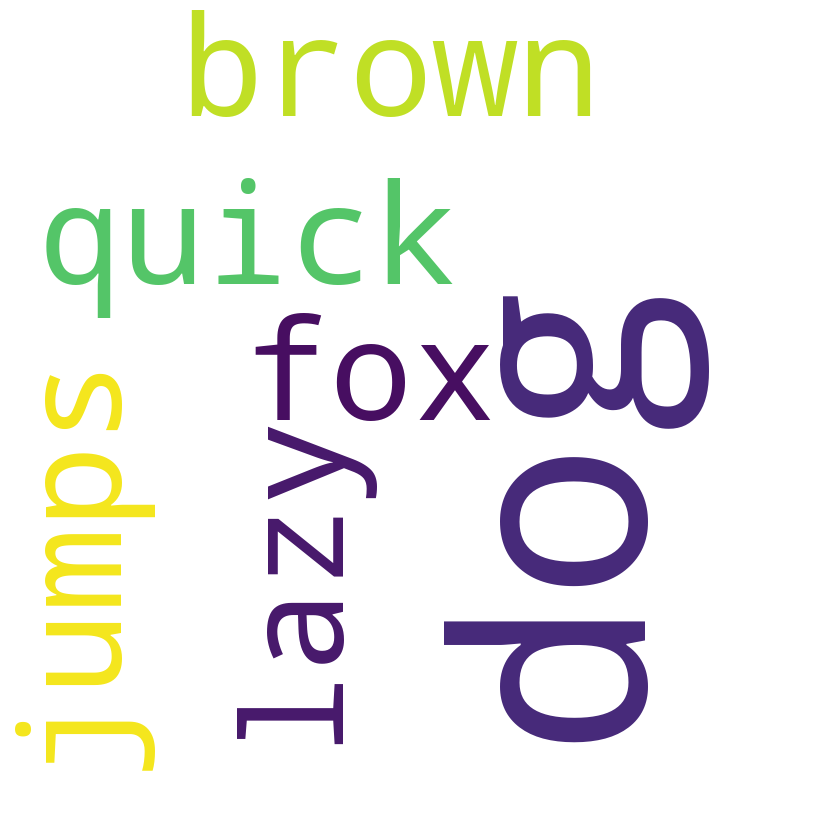

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "Hola como estas, jajajaja, que haces?"
text = "The quick brown fox jumps over the lazy dog dog dog dog dog dog dog dog dog dog dog dog dog dog dog dog dog dog "

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=3).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
